In [1]:
import tarfile
import numpy as np
import matplotlib.pyplot as plt

# on Worker node [192.168.58.68]

## Experiment Setup
```
### Config: [TurboBoostOn.HyperThreadOn, TurboBoostOff.HyperThreadOff]
### Iterations: 3
### Number CPUs: TurboBoostOn.HyperThreadOn -> [1 - 176], TurboBoostOff.HyperThreadOff-> [1 - 176]
### Workload: stress-ng --vm ${i} --vm-bytes 2G --mmap ${i} --mmap-bytes 2G --page-in -t ${TIME}s
```

In [14]:
def plot(axs, combofig):
    # Plot data on each subplot
    for i, ax in enumerate(axs.flat):
        print(combofig[i])
    
        iter=combofig[i][0]
        tbht=combofig[i][1]
        ncpus=combofig[i][2]
        
        x = []
        ycpu = []
        ycpu_std = []
        ydram = []
        ydram_std = []
        for ncpu in range(1, ncpus+1):
            fname = f"results/stress-ng.iter{iter}.numcpus{ncpu}.{tbht}.vm2G.60"
            #print(f"🟢 🟢 Reading {fname} 🟢 🟢")
            f=tar.extractfile(fname)
            content=f.read()
            decoded_content = content.decode("utf-8")
            cpupkgs=[]
            drampkgs=[]
            for line in decoded_content.split("\n"):
                if len(line) > 0:
                    ll = line.split(" ")
                    if float(ll[0]) > 0.0 and float(ll[1]) > 0.0:
                        cpupkgs.append(float(ll[0]))
                        drampkgs.append(float(ll[1]))
            #print(np.mean(np.array(cpupkgs)), np.std(np.array(cpupkgs)))
            x.append(ncpu)
            ycpu.append(np.mean(np.array(cpupkgs)))
            ycpu_std.append(np.std(np.array(cpupkgs)))
            ydram.append(np.mean(np.array(drampkgs)))
            ydram_std.append(np.std(np.array(drampkgs)))
        ax.errorbar(x, ycpu, yerr=ycpu_std, fmt='x', capsize=1, label="CPU Package")
        ax.errorbar(x, ydram, yerr=ydram_std, fmt='o', capsize=1, label="DRAM Package")
        ax.set_xlabel('Number of CPUs')
        ax.set_ylabel('Mean Package Power (W)')
        ax.set_ylim(bottom=0, top=500)
        ax.set_title(f"Iteration [{iter+1}], {tbht}")
        ax.grid(True)
        ax.legend()
        #plt.show()
        
    # Adjust layout
    plt.tight_layout()
    #plt.title("stress-ng --vm $ncpu --vm-bytes 2G --mmap $ncpu --mmap-bytes 2G --page-in -t 60s")
    # Show the plot
    plt.show()
    
tar = tarfile.open("../results/stress-ng-vm-results.tar.gz")


[0, 'TurboOn.HyperThreadOn', 176]
[1, 'TurboOn.HyperThreadOn', 176]
[2, 'TurboOn.HyperThreadOn', 176]
[0, 'TurboOff.HyperThreadOff', 176]
[1, 'TurboOff.HyperThreadOff', 176]
[2, 'TurboOff.HyperThreadOff', 176]


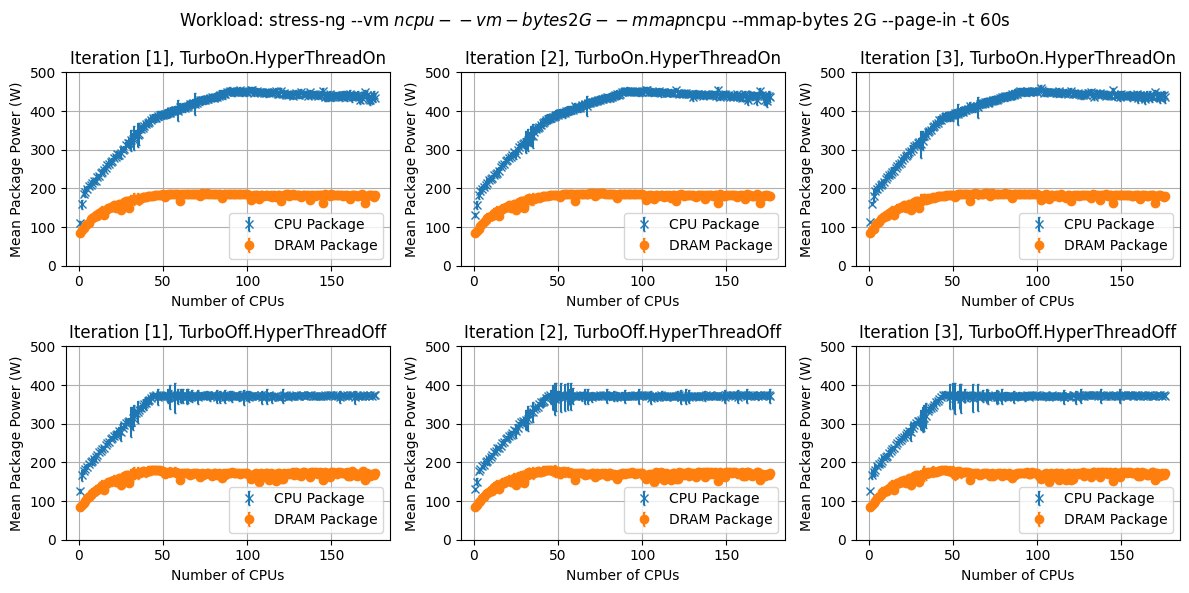

In [16]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

combofig = {0: [0, "TurboOn.HyperThreadOn", 176], 1: [1, "TurboOn.HyperThreadOn", 176], 2: [2, "TurboOn.HyperThreadOn", 176],
           3: [0, "TurboOff.HyperThreadOff", 176], 4: [1, "TurboOff.HyperThreadOff", 176], 5: [2, "TurboOff.HyperThreadOff", 176]}
fig.suptitle("Workload: stress-ng --vm $ncpu --vm-bytes 2G --mmap $ncpu --mmap-bytes 2G --page-in -t 60s")
plot(axs, combofig)